### This notebook is not for presentation purpose

The entire EDA process took about 2 weeks which many different aspects of the dataset was look into. Some important, some not so important. Many notebooks were created and deleted.

I have decided to archive this version of the notebook without tidying it up as a testament of the long cleaning and preparation process. Like the "working" space during math assignments in the past.

In [1]:
# Import relevant libraries and modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

In [2]:
df = pd.read_csv('ethereumLarge.csv')

In [4]:
df.FLAG.value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

### Understanding the Raw Data and the Available Features

The raw dataset contained a total of 9841 rows and 50 columns.

Unique Data Columns<br/>
* Index - Irrelevant column
* Address - This is going to be our the ethereum account identifier

Binary Classification Column<br/>
* FLAG - This is a boolean column where 0 stands for normal account and 1 stands for illicit account.

There are another 47 columns of data features relating to transaction history.

In [4]:
df.columns

Index(['Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time betwe

### Data Cleaning Step 1

* Remove irrelevant observations
* Remove duplicates
* Remove unwanted columns that does not add value to the model

In [5]:
# In order to use df.duplicated, Index row must first be dropped as Index row will cause every row to be unique.
# Index is also irrelevant observations

df = df.drop(['Index'],axis=1)

In [6]:
# There are 18 duplicated rows

df.duplicated().value_counts()

False    9823
True       18
dtype: int64

In [7]:
# Dropping these duplicated rows

df = df.drop_duplicates()

In [8]:
# Check new shape
df.shape

(9823, 49)

In [9]:
# Given 'Address' is supposed to be unique, the column should not have duplicate as well.
# However, there are 7 duplicated 'Address' with potentially different data in other features columns.
df[df.duplicated('Address')]

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2935,0x4c24af967901ec87a6644eb1ef42b680f58e67f5,0,3098.05,4755.44,382590.08,36,57,0,2,2,...,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,3.0,None,VIU
2938,0x4c271764eadcf0d07e5a937b2de290294c9d11c2,0,0.00,4695.70,319307.70,0,68,1,5,0,...,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,2.0,None,OmiseGO
2944,0x4c7520df888aa4569a37ac7d132f89c65821f0af,0,0.00,125704.72,628523.60,0,5,0,5,0,...,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,7.0,None,Livepeer Token
2945,0x4c77f6b01da78d053d5885e43bce5239b623dd3e,0,88542.07,8570.37,619849.82,4,31,0,14,2,...,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,9.0,None,ECHARGE
2946,0x4c7accc2689708892be29256fbe9d45a92f0aa97,0,1698.92,2127.67,793491.68,40,341,0,9,6,...,0.77336,100.0,50.38668,0.0,0.0,0.0,2.0,10.0,blockwell.ai KYC Casper Token,YouDeal Token
2949,0x4cad652b71519a7a68d05dada31122c4c9a5ed95,0,71349.06,14955.28,803222.32,10,6,0,4,8,...,0.00000,4920.0,1732.00000,0.0,0.0,0.0,3.0,5.0,AVT,Dao.Casino
2951,0x4cb981a7a2956cdfa8afbf454cb4e1b13c69aeb9,0,0.00,14218.10,412324.93,0,29,0,1,0,...,0.00000,0.0,0.00000,0.0,0.0,0.0,0.0,21.0,None,DATAcoin


<b>Investigate the 7 duplicated 'Address'</b>

* 0x4c24af967901ec87a6644eb1ef42b680f58e67f5
* 0x4c271764eadcf0d07e5a937b2de290294c9d11c2
* 0x4c7520df888aa4569a37ac7d132f89c65821f0af
* 0x4c77f6b01da78d053d5885e43bce5239b623dd3e	
* 0x4c7accc2689708892be29256fbe9d45a92f0aa97
* 0x4cad652b71519a7a68d05dada31122c4c9a5ed95
* 0x4cb981a7a2956cdfa8afbf454cb4e1b13c69aeb9	

In [10]:
# Increase the columns to display
pd.set_option("display.max_columns", 49)

In [11]:
# The only difference in this row is ERC20_most_rec_token_type - INS Promo vs VIU (Both Flag 0)
df.loc[df['Address'] == '0x4c24af967901ec87a6644eb1ef42b680f58e67f5']

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2910,0x4c24af967901ec87a6644eb1ef42b680f58e67f5,0,3098.05,4755.44,382590.08,36,57,0,2,2,0.098677,1.02121,0.417608,0.098234,3.06104,0.660712,0.0,0.0,0.0,93,23.785623,23.803631,0.0,0.018009,3.0,225.541698,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,205.045342,75.180566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,None,INS Promo
2935,0x4c24af967901ec87a6644eb1ef42b680f58e67f5,0,3098.05,4755.44,382590.08,36,57,0,2,2,0.098677,1.02121,0.417608,0.098234,3.06104,0.660712,0.0,0.0,0.0,93,23.785623,23.803631,0.0,0.018009,3.0,225.541698,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,205.045342,75.180566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,None,VIU


In [12]:
# The only difference in this row is ERC20_most_rec_token_type - DATAcoin vs OmiseGO (Both Flag 0)
df.loc[df['Address'] == '0x4c271764eadcf0d07e5a937b2de290294c9d11c2']

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2913,0x4c271764eadcf0d07e5a937b2de290294c9d11c2,0,0.0,4695.7,319307.7,0,68,1,5,0,0.0,1.001958,0.582851,0.0,0.0,0.0,0.0,0.0,0.0,69,0.0,39.633843,0.0,39.633843,2.0,1.332144,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.489173,0.842971,0.666072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,None,DATAcoin
2938,0x4c271764eadcf0d07e5a937b2de290294c9d11c2,0,0.0,4695.7,319307.7,0,68,1,5,0,0.0,1.001958,0.582851,0.0,0.0,0.0,0.0,0.0,0.0,69,0.0,39.633843,0.0,39.633843,2.0,1.332144,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.489173,0.842971,0.666072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,None,OmiseGO


In [13]:
# The only difference in this row is ERC20_most_rec_token_type - XENON vs Livepeer Token (Both Flag 0)
df.loc[df['Address'] == '0x4c7520df888aa4569a37ac7d132f89c65821f0af']

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2919,0x4c7520df888aa4569a37ac7d132f89c65821f0af,0,0.0,125704.72,628523.6,0,5,0,5,0,0.008496,1.5,0.580704,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,2.903522,0.0,2.903522,7.0,457.650335,0.0,0.0,0.0,6.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,395.797879,65.378619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,None,XENON
2944,0x4c7520df888aa4569a37ac7d132f89c65821f0af,0,0.0,125704.72,628523.6,0,5,0,5,0,0.008496,1.5,0.580704,0.0,0.0,0.0,0.0,0.0,0.0,5,0.0,2.903522,0.0,2.903522,7.0,457.650335,0.0,0.0,0.0,6.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,395.797879,65.378619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,None,Livepeer Token


In [14]:
# The only difference in this row is ERC20_most_rec_token_type - Livepeer Token vs ECHARGE(Both Flag 0)
df.loc[df['Address'] == '0x4c77f6b01da78d053d5885e43bce5239b623dd3e']

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2920,0x4c77f6b01da78d053d5885e43bce5239b623dd3e,0,88542.07,8570.37,619849.82,4,31,0,14,2,2.0,236.0,48.003226,1.801281,1453.6083,372.023677,0.0,0.0,0.0,35,1488.094708,1488.1,0.0,0.005292,9.0,817.44965,0.0,0.0,0.0,8.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,600.0,90.827739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,None,Livepeer Token
2945,0x4c77f6b01da78d053d5885e43bce5239b623dd3e,0,88542.07,8570.37,619849.82,4,31,0,14,2,2.0,236.0,48.003226,1.801281,1453.6083,372.023677,0.0,0.0,0.0,35,1488.094708,1488.1,0.0,0.005292,9.0,817.44965,0.0,0.0,0.0,8.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,600.0,90.827739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,None,ECHARGE


In [15]:
# There are 2 differences in this row as below
# ERC20 most sent token type - OmiseGO vs blockwell.ai KYC Casper Token
# ERC20 most rec token type - XENON vs YouDeal Token
df.loc[df['Address'] == '0x4c7accc2689708892be29256fbe9d45a92f0aa97']

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2921,0x4c7accc2689708892be29256fbe9d45a92f0aa97,0,1698.92,2127.67,793491.68,40,341,0,9,6,0.002,2.779804,0.859973,0.0,26.389848,7.33078,0.0,0.0,0.0,381,293.231188,293.250828,0.0,0.019641,12.0,22488.43592,100.77336,0.0,2.0,8.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,20071.0,2248.843592,0.77336,100.0,50.38668,0.0,0.0,0.0,2.0,10.0,OmiseGO,XENON
2946,0x4c7accc2689708892be29256fbe9d45a92f0aa97,0,1698.92,2127.67,793491.68,40,341,0,9,6,0.002,2.779804,0.859973,0.0,26.389848,7.33078,0.0,0.0,0.0,381,293.231188,293.250828,0.0,0.019641,12.0,22488.43592,100.77336,0.0,2.0,8.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,20071.0,2248.843592,0.77336,100.0,50.38668,0.0,0.0,0.0,2.0,10.0,blockwell.ai KYC Casper Token,YouDeal Token


In [16]:
# There is one difference in this row as below
# ERC20 most sent token type - Dao Casino vs AVT

df.loc[df['Address'] == '0x4cad652b71519a7a68d05dada31122c4c9a5ed95']

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2924,0x4cad652b71519a7a68d05dada31122c4c9a5ed95,0,71349.06,14955.28,803222.32,10,6,0,4,8,0.001405,4.523699,1.643651,0.0,2.163409,0.928332,0.0,0.0,0.0,16,9.283324,9.861906,0.0,0.578583,12.0,17869.13613,5196.0,0.0,3.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,4853.136133,1985.45957,0.0,4920.0,1732.0,0.0,0.0,0.0,3.0,5.0,Dao.Casino,Dao.Casino
2949,0x4cad652b71519a7a68d05dada31122c4c9a5ed95,0,71349.06,14955.28,803222.32,10,6,0,4,8,0.001405,4.523699,1.643651,0.0,2.163409,0.928332,0.0,0.0,0.0,16,9.283324,9.861906,0.0,0.578583,12.0,17869.13613,5196.0,0.0,3.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,4853.136133,1985.45957,0.0,4920.0,1732.0,0.0,0.0,0.0,3.0,5.0,AVT,Dao.Casino


In [17]:
# There is one difference in this row as below
# ERC20 most rec token type - Livepeer Token vs DATAcoin

df.loc[df['Address'] == '0x4cb981a7a2956cdfa8afbf454cb4e1b13c69aeb9']

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
2926,0x4cb981a7a2956cdfa8afbf454cb4e1b13c69aeb9,0,0.0,14218.1,412324.93,0,29,0,1,0,9.99,40.0,23.724138,0.0,0.0,0.0,0.0,0.0,0.0,29,0.0,688.0,0.0,688.0,21.0,4598776.195,0.0,0.0,0.0,17.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,4590000.0,218989.3426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,None,Livepeer Token
2951,0x4cb981a7a2956cdfa8afbf454cb4e1b13c69aeb9,0,0.0,14218.1,412324.93,0,29,0,1,0,9.99,40.0,23.724138,0.0,0.0,0.0,0.0,0.0,0.0,29,0.0,688.0,0.0,688.0,21.0,4598776.195,0.0,0.0,0.0,17.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,4590000.0,218989.3426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,None,DATAcoin


<b>Investigation results</b>

There are 7 duplicated value in the 'Address' column out of 9823 rows. All Flag 0 and the differences are in the 'ERC20 most sent token type' and 'ERC_most_rec_token_type' column. Given the small number size, differences and potentially low impact, we will not drop the 7 rows for now and move to the next task.

We may drop the Address column eventually at a later stage.

The next task is to explore and see if there are unwanted columns that provides little to no value in our model.

In [18]:
# There are columns with Mean = 0 which means the values are all zeros or null which are no value to our model.

df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9823.000000,9823.000000,9823.000000,9.823000e+03,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9.823000e+03,9.823000e+03,9823.000000,9.823000e+03,8994.000000,8.994000e+03,8.994000e+03,8994.000000,8994.000000,8994.000000,8994.000000,8994.000000,8994.0,8994.0,8994.0,8994.0,8994.000000,8.994000e+03,8.994000e+03,8.994000e+03,8.994000e+03,8.994000e+03,8994.0,8994.0,8994.0,8994.000000,8994.000000
mean,0.221826,5092.595652,8011.602499,2.184347e+05,116.074417,163.972106,3.736537,30.406495,25.868472,43.785903,523.692459,100.638887,4.806480,314.528353,44.638924,0.000003,0.000008,0.000005,283.783060,1.017806e+04,1.165818e+04,0.000008,1.480124e+03,36.292751,1.298795e+08,1.389373e+07,111.161233,5.646765,7.604514,0.003447,4.899933,0.0,0.0,0.0,0.0,486.518054,1.255029e+08,4.354898e+06,1.176474e+04,1.306006e+07,6.331012e+06,0.0,0.0,0.0,1.381588,4.824772
std,0.415496,21505.395360,23097.130771,3.229212e+05,757.890300,941.675903,141.575042,298.892226,264.058187,326.137833,13020.716151,2887.614225,138.736510,6635.215478,239.127317,0.000226,0.000516,0.000324,1353.589778,3.586507e+05,3.645380e+05,0.000516,2.426474e+05,447.965241,1.054912e+10,1.181571e+09,6134.763281,105.357403,81.897284,0.065763,17.238910,0.0,0.0,0.0,0.0,16900.153481,1.054795e+10,2.143333e+08,1.054621e+06,1.181085e+09,5.920680e+08,0.0,0.0,0.0,6.720471,16.670650
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.171250e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.424921,0.000000,0.160818,0.085688,0.000000,0.000000,0.000000,4.000000,2.251911e-01,2.674521e+00,0.000000,6.207450e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,513.420000,4.695758e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095006,6.000000,1.724272,0.049139,4.999276,1.599475,0.000000,0.000000,0.000000,8.000000,1.244669e+01,3.050000e+01,0.000000,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,564.305000,5494.510000,3.041145e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,66.992806,22.000000,0.998800,61.337946,21.999380,0.000

In [19]:
# Display columns with Mean
df.mean()

FLAG                                                    2.218263e-01
Avg min between sent tnx                                5.092596e+03
Avg min between received tnx                            8.011602e+03
Time Diff between first and last (Mins)                 2.184347e+05
Sent tnx                                                1.160744e+02
Received Tnx                                            1.639721e+02
Number of Created Contracts                             3.736537e+00
Unique Received From Addresses                          3.040649e+01
Unique Sent To Addresses                                2.586847e+01
min value received                                      4.378590e+01
max value received                                      5.236925e+02
avg val received                                        1.006389e+02
min val sent                                            4.806480e+00
max val sent                                            3.145284e+02
avg val sent                      

In [20]:
# Drop columns with mean 0 - ERC20 avg time (4 columns) + ERC20 min val, max val, avg val(3 columns).
df = df.drop([' ERC20 avg time between sent tnx',' ERC20 avg time between rec tnx',
             ' ERC20 avg time between rec 2 tnx',' ERC20 avg time between contract tnx',
             ' ERC20 min val sent contract',' ERC20 max val sent contract',' ERC20 avg val sent contract'],axis=1)

In [21]:
# Check remaining columns
df.mean()

FLAG                                                    2.218263e-01
Avg min between sent tnx                                5.092596e+03
Avg min between received tnx                            8.011602e+03
Time Diff between first and last (Mins)                 2.184347e+05
Sent tnx                                                1.160744e+02
Received Tnx                                            1.639721e+02
Number of Created Contracts                             3.736537e+00
Unique Received From Addresses                          3.040649e+01
Unique Sent To Addresses                                2.586847e+01
min value received                                      4.378590e+01
max value received                                      5.236925e+02
avg val received                                        1.006389e+02
min val sent                                            4.806480e+00
max val sent                                            3.145284e+02
avg val sent                      

In [22]:
# Print new shape
df.shape

(9823, 42)

### Data Cleaning Step 2 

Fix Structural Errors (Standardization)

* Naming convention
* Typos
* Data Types Conversions
* Removing white spaces

In [23]:
# Check data types & existence of null values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 0 to 9840
Data columns (total 42 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9823 non-null   object 
 1   FLAG                                                  9823 non-null   int64  
 2   Avg min between sent tnx                              9823 non-null   float64
 3   Avg min between received tnx                          9823 non-null   float64
 4   Time Diff between first and last (Mins)               9823 non-null   float64
 5   Sent tnx                                              9823 non-null   int64  
 6   Received Tnx                                          9823 non-null   int64  
 7   Number of Created Contracts                           9823 non-null   int64  
 8   Unique Received From Addresses                        9823

In [24]:
# Check FLAG column to consist of only 0 and 1 - tallies with total number of 9823 rows.
df['FLAG'].value_counts()

0    7644
1    2179
Name: FLAG, dtype: int64

In [25]:
df.columns = df.columns.str.replace(' ','_')

In [26]:
df.columns = df.columns.str.lower()

In [27]:
# whitespaces are replaced with _ to maintain some level of readability while removing potential errors due to whitespaces.
# column names converted to lowercase because certain machine learning model requires lowercase.
df.columns

Index(['address', 'flag', 'avg_min_between_sent_tnx',
       'avg_min_between_received_tnx',
       'time_diff_between_first_and_last_(mins)', 'sent_tnx', 'received_tnx',
       'number_of_created_contracts', 'unique_received_from_addresses',
       'unique_sent_to_addresses', 'min_value_received', 'max_value_received_',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions_(including_tnx_to_create_contract',
       'total_ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance',
       '_total_erc20_tnxs', '_erc20_total_ether_received',
       '_erc20_total_ether_sent', '_erc20_total_ether_sent_contract',
       '_erc20_uniq_sent_addr', '_erc20_uniq_rec_addr',
       '_erc20_uniq_sent_addr.1', '_erc20_uniq_rec_contract_addr',
       '_erc20_min_val_rec', '_erc20_max_val_rec', '_erc20_avg_val_rec',
 

In [28]:
# There are two object Dtype in '_erc20_most_sent_token_type' and '_erc20_most_rec_token_type'
# Investigate these two objects

df['_erc20_most_sent_token_type'].value_counts()

# 305 unique catergories
# 4388 count of '0'
# 1853 count of 'None'
# 1191 count of whitespaces.

0                  4388
None               1853
                   1191
EOS                 138
OmiseGO             136
                   ... 
TYT                   1
SCAM Seal Token       1
300 Token             1
Loom                  1
Everex                1
Name: _erc20_most_sent_token_type, Length: 305, dtype: int64

In [29]:
df['_erc20_most_rec_token_type'].value_counts()
# 467 unique catergories
# 4388 count of '0'

0                         4388
OmiseGO                    870
Blockwell say NOTSAFU      779
DATAcoin                   358
Livepeer Token             205
                          ... 
Titanium BAR Token           1
DragonGameCoin               1
RHOC                         1
Herocoin                     1
Lendroid Support Token       1
Name: _erc20_most_rec_token_type, Length: 467, dtype: int64

In [30]:
df['_erc20_most_rec_token_type'].unique()

array(['Numeraire', 'Livepeer Token', 'XENON', 'EOS', '0', 'AICRYPTO',
       'DATAcoin', 'PoSToken', 'KyberNetwork', 'None', 'Bancor',
       'OmiseGO', 'ONOT', 'Tronix', 'StatusNetwork',
       'SAFE.AD - 20% DISCOUNT UNTIL 1 MAY', nan, 'Storj', 'bitqy',
       'Beauty Coin', 'SONM', 'NEVERDIE', 'INS Promo', 'TenXPay',
       'Cybereits Token', 'FunFair', 'DGD', 'iEx.ec Network Token',
       'AION', 'Aragon', 'Cofoundit', 'Golem', 'CRYPTOPUNKS', 'Nitro',
       'Ether Token', 'VeChain', 'Reputation', 'Intelion', 'Dochain',
       'SwarmCity', 'BAT', 'LockTrip', 'Humaniq', 'KickCoin', 'BOX Token',
       'MobileGo', 'Monaco', 'Azbit', 'Nexium', 'ZGC', 'www.pnztrust.com',
       'Send your ETH to this contract and earn 2.55% every day for Live-long. https://255eth.club',
       'empowr', 'An Etheal Promo', 'BitClave', 'Bytom',
       'Identity Hub Token', 'Celsius', 'Raiden', 'Trustcoin', 'ARP',
       'Qtum', 'Poker Chips', 'Loopring', 'Penta Network Token', 'Salt',
       'ICONOMI',

<b>Investigation Remarks</b>

More than half of both categorical columns are zeros and null values. Should these 2 columns remain? The values are token types that the account has received and may play a part in identifying illicit behaviors, but the quality of the data in this column is too poor.  

### Data Cleaning Step 3

Filter Unwanted Outliers

Code for sweetviz below.

visual_report = sv.analyze(df)
visual_report.show_html()

Results - Apart from 'Address'

Other features to be dropped as follow because of lower contribution of information for the model

<b>'number_of_created_contracts' </b> - 86% of data is zeros

<b>'min_value_sent_to_contract'</b> - 99% of data is zeros

<b>'max_val_sent_to_contract' </b> - 99% of data is zeros

<b>'avg_value_sent_to_contract' </b> - 99% of data is zeros

<b>'total_ether_sent_contracts' </b> - 99% of data is zeros

<b>'_erc20_total_ether_received' </b> - 45% of data is zeros

<b>'_erc20_total_ether_sent' </b> - 86% of data is zeros

<b>'_erc20_total_ether_sent_contract' </b> - 99.7% of data is zeros

<b>'_erc20_uniq_sent_addr' </b> - 82.6% of data is zeros

<b>'_erc20_uniq_rec_addr' </b> - 49.2% of data is zeros

<b>'_erc20_uniq_sent_addr.1' </b> - 99.9% of data is zeros

<b>'_erc20_uniq_rec_contract_addr' </b> - 49.2% of data is zeros

<b>'_erc20_min_val_rec' </b> - 74.7% of data is zeros

<b>'_erc20_max_val_rec' </b> - 50.9% of data is zeros

<b>'_erc20_avg_val_rec' </b> - 50.9% of data is zeros

<b>'_erc20_min_val_sent' </b> - 91.5% of data is zeros

<b>'_erc20_max_val_sent' </b> - 83.6% of data is zeros

<b>'_erc20_avg_val_sent' </b> - 83.6% of data is zeros

<b>'_erc20_uniq_sent_token_name' </b> - 82.6% of data is zeros

<b>'_erc20_uniq_rec_token_name' </b> - 49.2% of data is zeros


In [31]:
df.columns

Index(['address', 'flag', 'avg_min_between_sent_tnx',
       'avg_min_between_received_tnx',
       'time_diff_between_first_and_last_(mins)', 'sent_tnx', 'received_tnx',
       'number_of_created_contracts', 'unique_received_from_addresses',
       'unique_sent_to_addresses', 'min_value_received', 'max_value_received_',
       'avg_val_received', 'min_val_sent', 'max_val_sent', 'avg_val_sent',
       'min_value_sent_to_contract', 'max_val_sent_to_contract',
       'avg_value_sent_to_contract',
       'total_transactions_(including_tnx_to_create_contract',
       'total_ether_sent', 'total_ether_received',
       'total_ether_sent_contracts', 'total_ether_balance',
       '_total_erc20_tnxs', '_erc20_total_ether_received',
       '_erc20_total_ether_sent', '_erc20_total_ether_sent_contract',
       '_erc20_uniq_sent_addr', '_erc20_uniq_rec_addr',
       '_erc20_uniq_sent_addr.1', '_erc20_uniq_rec_contract_addr',
       '_erc20_min_val_rec', '_erc20_max_val_rec', '_erc20_avg_val_rec',
 

In [32]:
df = df.drop(['address','number_of_created_contracts','min_value_sent_to_contract','max_val_sent_to_contract',
             'avg_value_sent_to_contract','total_ether_sent_contracts','_erc20_total_ether_received',
             '_erc20_total_ether_sent','_erc20_total_ether_sent_contract','_erc20_uniq_sent_addr','_erc20_uniq_rec_addr',
             '_erc20_uniq_sent_addr.1','_erc20_uniq_rec_contract_addr','_erc20_min_val_rec','_erc20_max_val_rec',
             '_erc20_avg_val_rec','_erc20_min_val_sent','_erc20_max_val_sent','_erc20_avg_val_sent',
             '_erc20_uniq_sent_token_name','_erc20_uniq_rec_token_name'],axis=1)

In [33]:
df.shape

(9823, 21)

In [34]:
# Null values - check co-rrelation using Heatmap to see if the columns with null values are worth keeping

# Actually need to work on the Null values first before the statistical test.
# Plot a curve with all the feature's variation.

df.info() # need to drop address, and the last 2 columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 0 to 9840
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   flag                                                  9823 non-null   int64  
 1   avg_min_between_sent_tnx                              9823 non-null   float64
 2   avg_min_between_received_tnx                          9823 non-null   float64
 3   time_diff_between_first_and_last_(mins)               9823 non-null   float64
 4   sent_tnx                                              9823 non-null   int64  
 5   received_tnx                                          9823 non-null   int64  
 6   unique_received_from_addresses                        9823 non-null   int64  
 7   unique_sent_to_addresses                              9823 non-null   int64  
 8   min_value_received                                    9823

In [35]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#X = df.iloc[:,0:41] #independent columns
#y = df.iloc[:,1] #target column i.e price range

# Remember to modify the data slices.
pass

In [36]:
#top10_features = SelectKBest(score_func=chi2, k=10)
#fit = top10_features.fit(X,y)
pass
# cannot convert String to Float. Does not work with String 

In [37]:
df.describe()

,flag,avg_min_between_sent_tnx,avg_min_between_received_tnx,time_diff_between_first_and_last_(mins),sent_tnx,received_tnx,unique_received_from_addresses,unique_sent_to_addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_(including_tnx_to_create_contract,total_ether_sent,total_ether_received,total_ether_balance,_total_erc20_tnxs
count,9823.000000,9823.000000,9823.000000,9.823000e+03,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9.823000e+03,9.823000e+03,9.823000e+03,8994.000000
mean,0.221826,5092.595652,8011.602499,2.184347e+05,116.074417,163.972106,30.406495,25.868472,43.785903,523.692459,100.638887,4.806480,314.528353,44.638924,283.783060,1.017806e+04,1.165818e+04,1.480124e+03,36.292751
std,0.415496,21505.395360,23097.130771,3.229212e+05,757.890300,941.675903,298.892226,264.058187,326.137833,13020.716151,2887.614225,138.736510,6635.215478,239.127317,1353.589778,3.586507e+05,3.645380e+05,2.426474e+05,447.965241
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.560535e+07,0.000000
25%,0.000000,0.000000,0.000000,3.171250e+02,1.000000,1.000000,1.000000,1.000000,0.001000,1.000000,0.424921,0.000000,0.160818,0.085688,4.000000,2.251911e-01,2.674521e+00,6.207450e-04,0.000000
50%,0.000000,17.340000,513.420000,4.695758e+04,3.000000,4.000000,2.000000,2.000000,0.095006,6.000000,1.724272,0.049139,4.999276,1.599475,8.000000,1.244669e+01,3.050000e+01,1.722000e-03,1.000000
75%,0.000000,564.305000,5494.510000,3.041145e+05,11.000000,27.000000,5.000000,3.000000,2.000000,66.992806,22.000000,0.998800,61.337946,21.999380,54.000000,1.009990e+02,1.010000e+02,4.473055e-02,3.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9999.000000,9287.000000,10000.000000,800000.000000,283618.831600,12000.000000,520000.000000,12000.000000,19995.000000,2.858096e+07,2.858159e+07,1.428864e+07,10001.000000


In [38]:
df.isnull().sum()

flag                                                      0
avg_min_between_sent_tnx                                  0
avg_min_between_received_tnx                              0
time_diff_between_first_and_last_(mins)                   0
sent_tnx                                                  0
received_tnx                                              0
unique_received_from_addresses                            0
unique_sent_to_addresses                                  0
min_value_received                                        0
max_value_received_                                       0
avg_val_received                                          0
min_val_sent                                              0
max_val_sent                                              0
avg_val_sent                                              0
total_transactions_(including_tnx_to_create_contract      0
total_ether_sent                                          0
total_ether_received                    

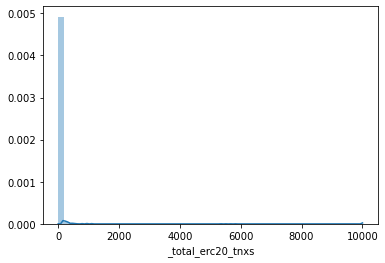

In [39]:
sns.distplot(df._total_erc20_tnxs);

In [42]:
df._total_erc20_tnxs.describe()

count     8994.000000
mean        36.292751
std        447.965241
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max      10001.000000
Name: _total_erc20_tnxs, dtype: float64

In [43]:
df['_total_erc20_tnxs'] = df['_total_erc20_tnxs'].fillna(0)

In [45]:
df._erc20_most_sent_token_type.value_counts()

0                  4388
None               1853
                   1191
EOS                 138
OmiseGO             136
                   ... 
TYT                   1
SCAM Seal Token       1
300 Token             1
Loom                  1
Everex                1
Name: _erc20_most_sent_token_type, Length: 305, dtype: int64

In [46]:
df['_erc20_most_sent_token_type'] = df['_erc20_most_sent_token_type'].fillna('others')

In [47]:
df._erc20_most_sent_token_type.value_counts()

0                   4388
None                1853
                    1191
others               841
EOS                  138
                    ... 
BitDice                1
BinaryCoin             1
BlockchainPoland       1
ethereumAI Token       1
Time New Bank          1
Name: _erc20_most_sent_token_type, Length: 306, dtype: int64

In [49]:
df["_erc20_most_sent_token_type"].replace({"0":"others", "None":"others", " ":"others"}, inplace=True)

In [50]:
df._erc20_most_sent_token_type.value_counts()

others                           8273
EOS                               138
OmiseGO                           136
Golem                             129
blockwell.ai KYC Casper Token     128
                                 ... 
realchain                           1
TYT                                 1
300 Token                           1
Piggies                             1
Rebellious                          1
Name: _erc20_most_sent_token_type, Length: 303, dtype: int64

In [53]:
df._erc20_most_rec_token_type.value_counts()

0                         4388
OmiseGO                    870
Blockwell say NOTSAFU      779
DATAcoin                   358
Livepeer Token             205
                          ... 
Titanium BAR Token           1
DragonGameCoin               1
RHOC                         1
Herocoin                     1
Lendroid Support Token       1
Name: _erc20_most_rec_token_type, Length: 467, dtype: int64

In [54]:
df['_erc20_most_rec_token_type'] = df['_erc20_most_rec_token_type'].fillna('others')

In [56]:
df["_erc20_most_rec_token_type"].replace({"0":"others", "None":"others", " ":"others"}, inplace=True)

In [57]:
df._erc20_most_rec_token_type.value_counts()

others                    5280
OmiseGO                    870
Blockwell say NOTSAFU      779
DATAcoin                   358
Livepeer Token             205
                          ... 
DragonGameCoin               1
RHOC                         1
Herocoin                     1
Nebulas                      1
Lendroid Support Token       1
Name: _erc20_most_rec_token_type, Length: 465, dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9823 entries, 0 to 9840
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   flag                                                  9823 non-null   int64  
 1   avg_min_between_sent_tnx                              9823 non-null   float64
 2   avg_min_between_received_tnx                          9823 non-null   float64
 3   time_diff_between_first_and_last_(mins)               9823 non-null   float64
 4   sent_tnx                                              9823 non-null   int64  
 5   received_tnx                                          9823 non-null   int64  
 6   unique_received_from_addresses                        9823 non-null   int64  
 7   unique_sent_to_addresses                              9823 non-null   int64  
 8   min_value_received                                    9823

In [71]:
# %matplotlib qt
pass

In [72]:
cor = df.corr()
f, ax = plt.subplots(figsize=(90,90))
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns, annot=True, ax=ax);
plt.show()

In [77]:
df.iloc[:,0:1]

,flag
0,0
1,0
2,0
3,0
4,0
...,...
9836,1
9837,1
9838,1
9839,1


<ipython-input-81-c12b0f762ae5>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X,y)


[0.0268482  0.06943827 0.14729749 0.04413088 0.0460097  0.11641457
 0.04320383 0.09367711 0.03911829 0.08102032 0.04511135 0.03546321
 0.06599796 0.0444461  0.03204189 0.03666975 0.03311107]


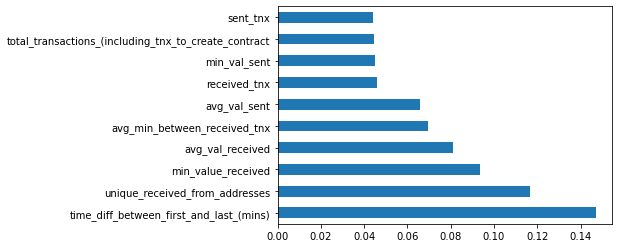

In [81]:
# Examine Feature importance

%matplotlib inline

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

X = df.iloc[:,1:18]
y = df.iloc[:,0:1] # target flag
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [83]:
# Select the top 10 features

df1 = df[['flag','sent_tnx','total_transactions_(including_tnx_to_create_contract','min_val_sent',
         'received_tnx','avg_val_sent','avg_min_between_received_tnx','avg_val_received','min_value_received',
         'unique_received_from_addresses','time_diff_between_first_and_last_(mins)']]
df1.head()

,flag,sent_tnx,total_transactions_(including_tnx_to_create_contract,min_val_sent,received_tnx,avg_val_sent,avg_min_between_received_tnx,avg_val_received,min_value_received,unique_received_from_addresses,time_diff_between_first_and_last_(mins)
0,0,721,810,0.00,89,1.200681,1093.71,6.589513,0.000000,40,704785.63
1,0,94,102,0.00,8,0.032844,2958.44,0.385685,0.000000,5,1218216.73
2,0,2,12,0.05,10,1.794308,2434.02,0.358906,0.113119,10,516729.30
3,0,25,34,0.00,9,70.001834,15785.09,99.488840,0.000000,7,397555.90
4,0,4598,4619,0.00,20,0.022688,10707.77,2.671095,0.000000,7,382472.42


In [84]:
df1.to_csv('ethereum_df1.csv', index=False)